In [6]:
import os
import io
import pandas as pd
import numpy as np

mix_list = []
density_list = []
density_stdv_list = []
for mix in os.listdir("result"):
    mix_list.append(float(mix.replace("ipa", "")))
    log_file = os.path.join("result", mix, "density", "log.langevin_npt")
    log_str = None
    with io.open(log_file, "r", newline="\n") as rf:
        log_str = rf.read()
    df = pd.read_csv(io.StringIO(log_str.split("bytes\n")[-1].split("Loop time")[0]), sep=r"\s+", index_col=None)
    density_list.append(df["Density"].mean())
    density_stdv_list.append(df["Density"].std())


exp_data = np.array([[0, 0.997067448680352],
[0.20187165775401072, 0.9670087976539591],
[0.393048128342246, 0.9281524926686218],
[0.4465240641711231, 0.9156891495601174],
[0.5093582887700535, 0.9013929618768329],
[0.5467914438502675, 0.8933284457478007],
[0.6002673796791445, 0.8819648093841643],
[0.6951871657754012, 0.8570381231671556],
[0.786096256684492, 0.8346774193548387],
[0.9986631016042782, 0.7811583577712611]])

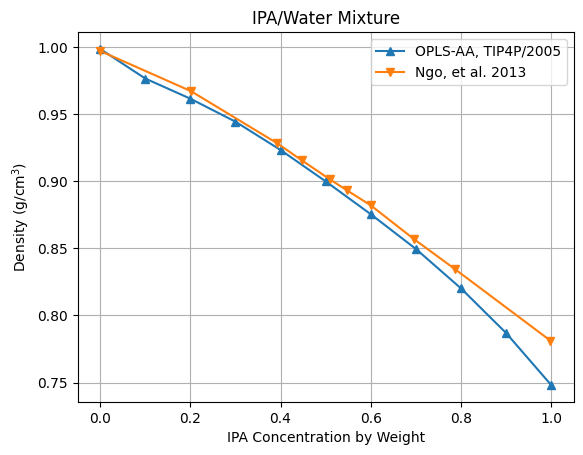

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(mix_list, density_list, marker="^", label="OPLS-AA, TIP4P/2005")
ax.plot(exp_data[:, 0], exp_data[:, 1], marker="v", label="Ngo, et al. 2013")
ax.set_title("IPA/Water Mixture")
ax.set_xlabel("IPA Concentration by Weight")
ax.set_ylabel("Density (g/cm" + r"$^3$" + ")")
ax.grid()
ax.legend()
fig.savefig("ipa_mix.png", transparent=True, dpi=300, bbox_inches="tight")

[https://doi.org/10.1016/j.jpowsour.2012.10.055](https://doi.org/10.1016/j.jpowsour.2012.10.055)<br>
![title](https://ars.els-cdn.com/content/image/1-s2.0-S0378775312016114-gr1.jpg)